# Trade income vs. Climate variability

**Hypothesis:** Settlements grow until they can take part in trading - this generates additional income. At a certain value of the Income from trade, this income must suffice to sustain the population of trading settlements.
At the verge of this parameter value, variability in the other sources of income can push settlements below the threshold for trading, leading to a cascading falure in the trade network.

To thest this, I vary the parameters for trade income and climate variability and see, if there is a value for the treade income that leads to big spreads in trajectories for different climate varability.

Ideally:
**Three variables: Trade strength[0, medium, high], Climate variability [0...high], Income from ecosystem services [high, normal, low]**

In [50]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

test = False

location = '/home/jakob/Project_MayaSim/Python/output_data/X5_trade_revised/results/trajectory'
if test:
    location = '/home/jakob/Project_MayaSim/Python/output_data/test_output/X5_trade_revised/results/traders_trajectory'
    
data = pd.read_pickle(location)
lvs = data.index.levels

cmap = mpl.cm.get_cmap('Spectral')
cls = cmap(np.linspace(0, 1, len(lvs[0])*len(lvs[1])))
cls2 = cmap(np.linspace(0, 1, 5))

Populating the interactive namespace from numpy and matplotlib


/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [54]:
def plotlines(data, level, key, unstack, cls, legend=True):
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    key[0] = False
    ax1.set_title(f"trade strenth = {key[-1]}")
    data['mean_trajectories'].xs(level=level, key=key).unstack(unstack).plot(ax=ax1, legend=False, color=cls)
    ax1.set_ylabel('total population')
    ax2 = fig.add_subplot(122)
    key[0] = True
    ln = data['mean_trajectories'].xs(level=level, key=key).unstack(unstack).plot(ax=ax2, color=cls, legend=legend)
    if legend:
        lg = ln.get_legend()
        bb = lg.get_bbox_to_anchor().inverse_transformed(ax2.transAxes)
        xOffset = .5
        bb.x0 += xOffset
        bb.x1 += xOffset
        lg.set_bbox_to_anchor(bb, transform = ax2.transAxes)

The following results show the time development of the total population in the area for different values of the prefactor of the trade strength and the climate (precipitation) variability. on the left side, settlements without agruculture remain, on the right side, they are removed.

Note, that higher climate variability also means lower average precipitation.

The differences are remarkable. 

* For low trade strength, they are not so pronounced. Both conditions how a peak in population in the beginning, then a rapid decline and sort of an equilibrium state in the long run. In both cases, the population is lower, if climate variability is higher.
* For intermediate trade strength [6000-8000] the first condition shows a strong difference in population levels, also in the long run (the second condition still doesn't). This means, that the development of the model is actually susceptible to the variation in precipitation and a developed complex society state could suffer deterioration from a drought event.
* For even higher levels of trade income (>8000) the long run population development becomes similar again e.g. the model becomes less susceptible to climate variation.

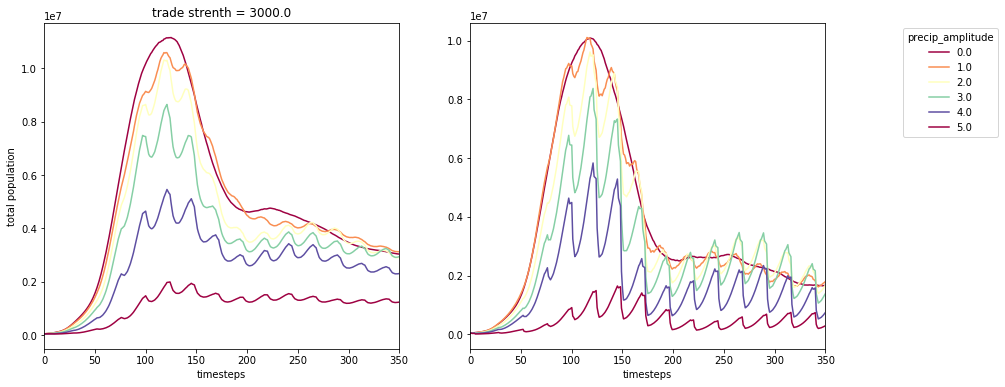

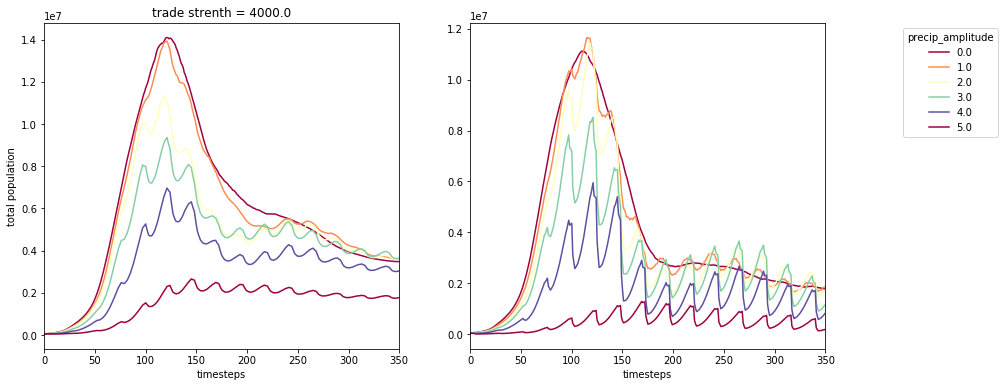

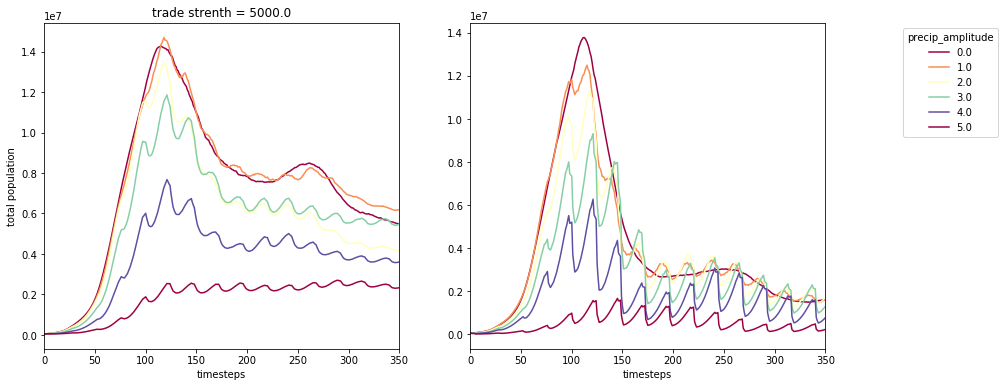

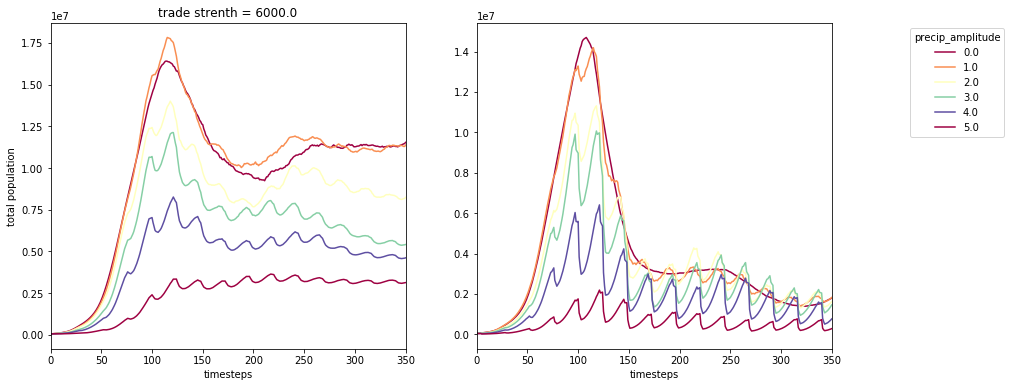

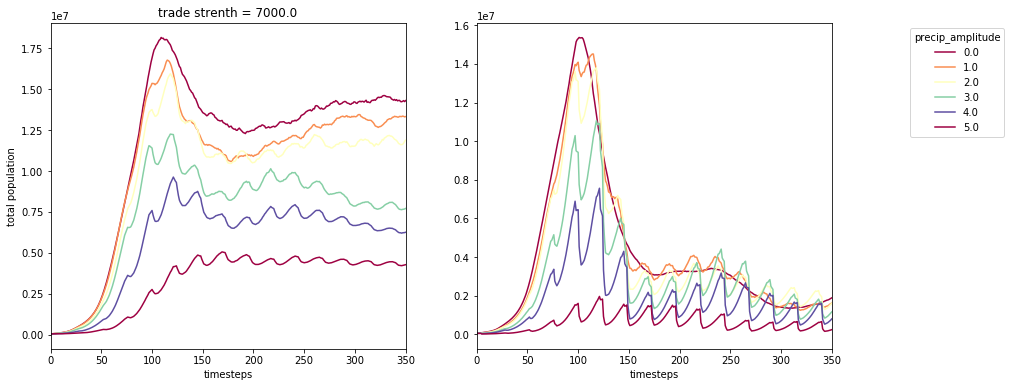

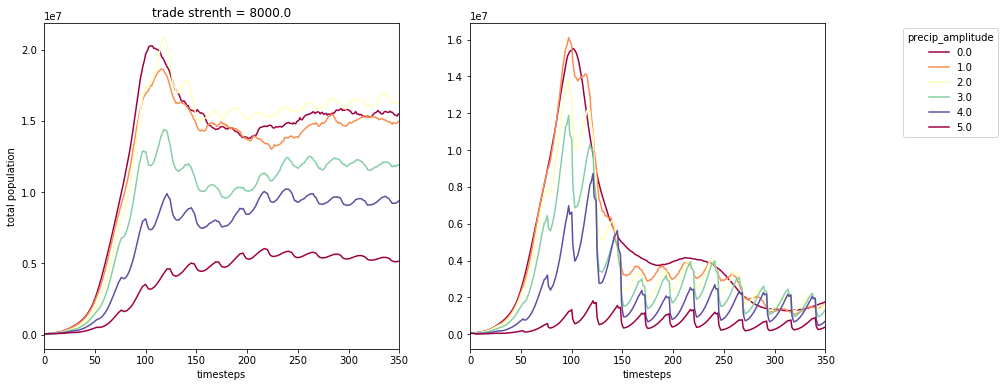

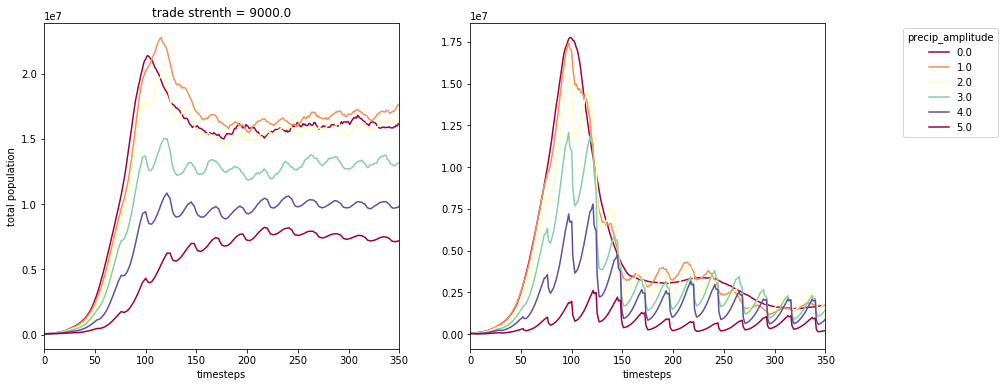

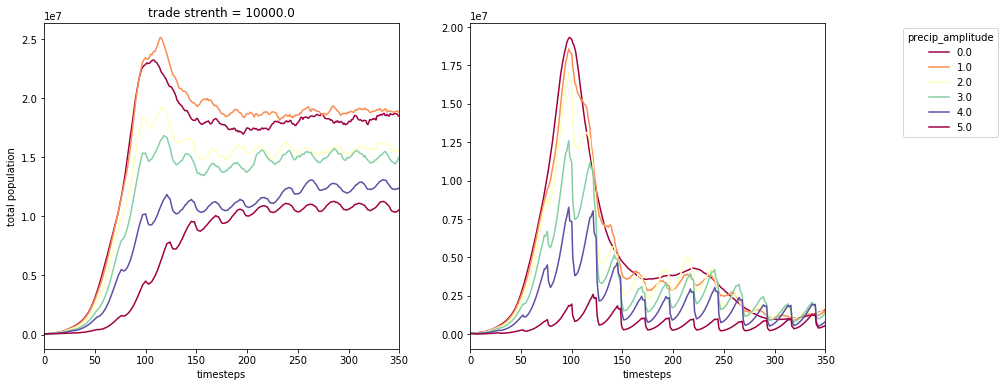

In [55]:
for ts in trade_strengths:
    key=[False, 'total_population', ts]
    level=['kill_cropless', 'observables', 'r_trade']
    unstack = ['precip_amplitude']

    plotlines(data, level, key, unstack, cls=cls2)

Bottom line, these results don't prove the hypothesis, but they are in line with it. This means, that drought events could really tip the system out of its complex society state.
To get a better picture, I will look at the different sources of income for trade strength = 7000 which neatly exhibits the features, that I was looking for.

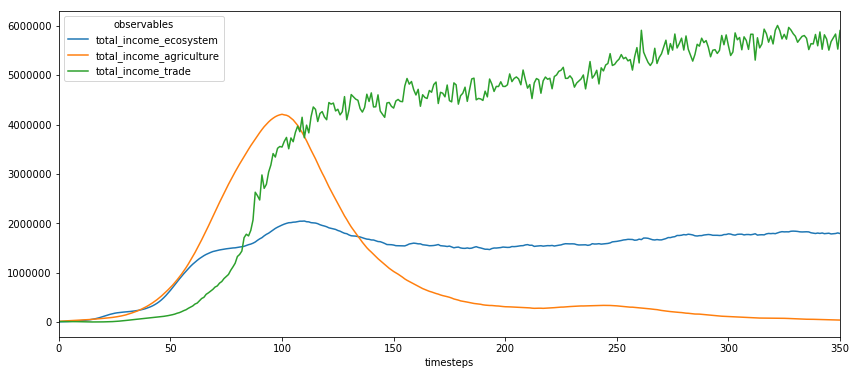

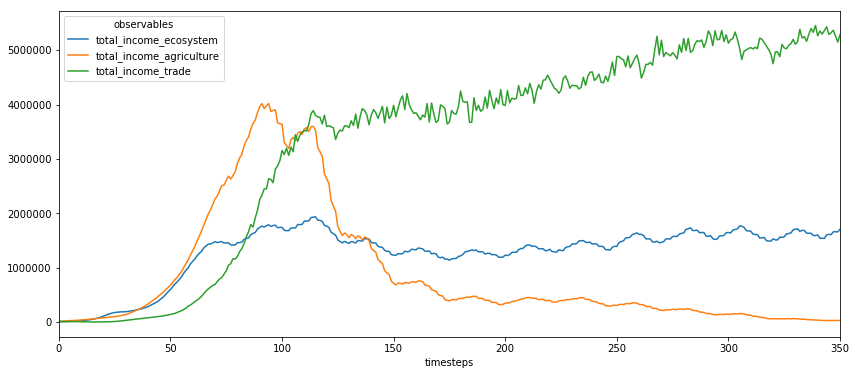

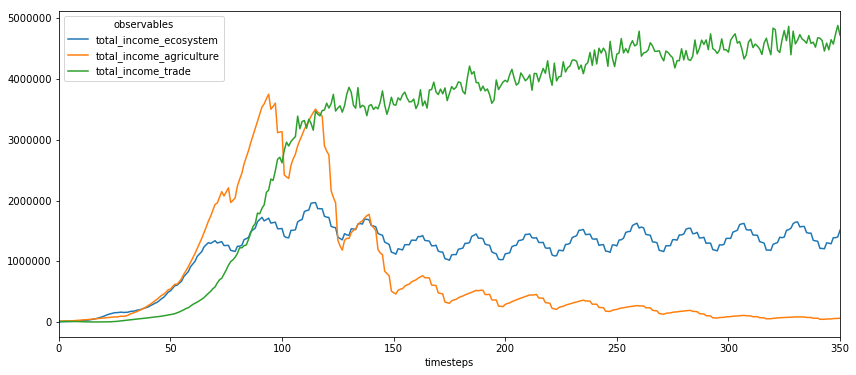

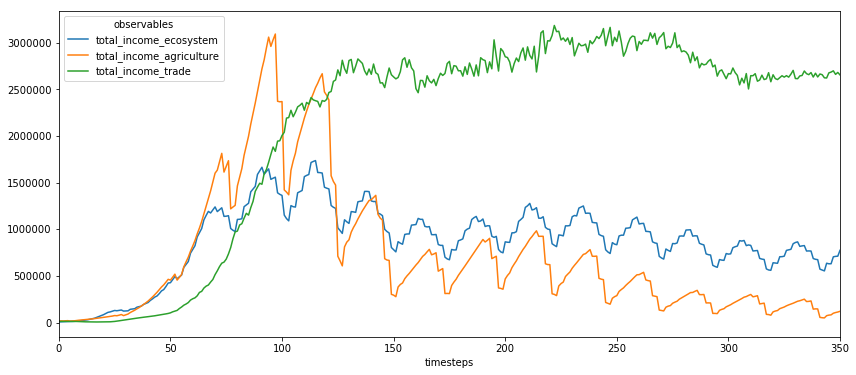

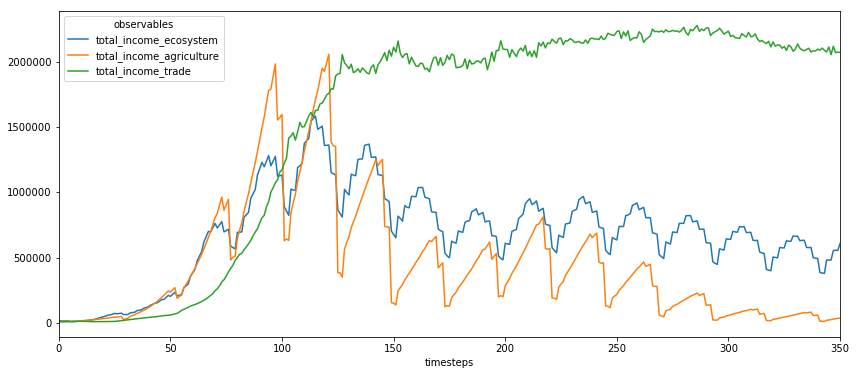

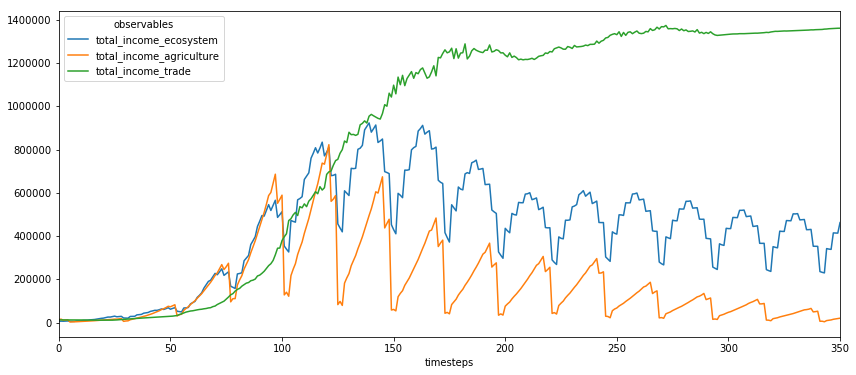

In [56]:
dt = data['mean_trajectories'].unstack('observables').xs(level=('r_trade', 'kill_cropless'), key=(7000., False))
for p in dt.index.levels[0]:
    df = dt.xs(level='precip_amplitude', key=p)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    df[['total_income_ecosystem', 'total_income_agriculture', 'total_income_trade']].plot(ax=ax)

These results show, that the variabilty in income from agruculture and ecosystem services caused by climate variabilty does not yet directly show in the income from trade (on the agregated level). I think, this is because the migration and demographic dynamics is still too slow to directly give this feedback. Yet, this could work out, if there is not just periodic variation but a sudden shift in the precipitation levels.

**Consequently, the next experiment would be: run the model without (or with little) climate variability until ~150 steps. Then introduce a drought event and see, how the system reacts/recovers. Drought events should vary in lengt and strength.**